In [1]:
import pandas as pd
import io
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt #to allow subplot creation
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

import plotly.figure_factory as ff
import plotly.graph_objects as go
from tabulate import tabulate

from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint # Generate random numbers

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  abdulshariq


Your Kaggle Key:

  ································


100%|██████████| 5.32M/5.32M [01:02<00:00, 89.3kB/s]


In [3]:
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv")

Skipping, found downloaded files in ".\credit-card-approval-prediction" (use force=True to force download)


In [5]:
df1 = pd.read_csv("credit-card-approval-prediction/application_record.csv")
df2 = pd.read_csv("credit-card-approval-prediction/credit_record.csv")

In [6]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [9]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

<AxesSubplot:ylabel='Frequency'>

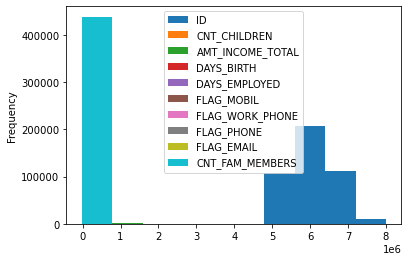

In [10]:
df1.plot.hist()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
null_count = df1.isnull().sum().reset_index(name = "null count")
unique_valuecount = df1.nunique().reset_index(name = "unique value count")
datatypes = df1.dtypes.reset_index(name="types")
pd.set_option('display.max_rows', 500)
pd.concat([null_count, unique_valuecount , datatypes], axis=1).T.drop_duplicates().T

,index,null count,unique value count,types
0,ID,0,438510,int64
1,CODE_GENDER,0,2,object
2,FLAG_OWN_CAR,0,2,object
3,FLAG_OWN_REALTY,0,2,object
4,CNT_CHILDREN,0,12,int64
5,AMT_INCOME_TOTAL,0,866,float64
6,NAME_INCOME_TYPE,0,5,object
7,NAME_EDUCATION_TYPE,0,5,object
8,NAME_FAMILY_STATUS,0,5,object
9,NAME_HOUSING_TYPE,0,6,object
